In [1]:
from google.colab import drive
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


Load the Real Estate valuation dataset ([source](https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set#)). This example shows how we can load Excel files in Pandas.

In [3]:
df_realest = pd.read_excel('/content/drive/My Drive/IAAE/data/Real estate valuation data set.xlsx')

In [4]:
df_realest.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
df_realest.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


Change the name of the target column to something shorter.

In [6]:
df_realest = df_realest.rename(columns={'Y house price of unit area':'HousePrice'})

Separate the predictors from the class and split into training and testing sets.

In [7]:
X = df_realest.drop('HousePrice',axis=1)
y = df_realest['HousePrice']

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=7)

Scale the training data. The scaler estimates the scaling parameters only with these data.

In [9]:
std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_arr = std_scaler.transform(X_train)
X_train_sc = pd.DataFrame(X_train_arr,columns=X_train.columns,index=X_train.index)


In [10]:
X_train_sc.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
62,-1.192612,-0.759460,-0.033580,0.861361,-0.390183,-0.474662,-1.353466
139,-0.549253,-1.646862,-0.404508,-0.462787,0.283028,-0.299716,0.249316
165,-0.332015,-0.759460,-0.335498,0.122613,-1.063394,0.673214,1.316976
314,0.912926,0.423742,-1.198121,-0.395362,0.619633,0.266382,0.885135
73,-1.100703,0.127942,-0.326871,2.360495,-1.399999,-2.247226,-1.916989


Scale the testing data using the parameters obtained above.

In [11]:
X_test_arr = std_scaler.transform(X_test)
X_test_sc = pd.DataFrame(X_test_arr,columns=X_test.columns,index=X_test.index)

### k-Nearest Neighbors for regression

We build a model with k=15 just for illustration purposes. We will see how to tune the value of hyperparameter k later in the course.

In [12]:
knn_model = KNeighborsRegressor(n_neighbors=15)

In [13]:
knn_model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=15)

In [14]:
y_pred = knn_model.predict(X_test)

We don't use the same metrics for regression than for classification. In this example, we compute the Mean Absolute Error (MAE).


In [15]:
mean_absolute_error(y_test,y_pred)

6.302133333333332

We combine the actual target values and the predictions into a dataframe in order to plot the differences.

In [16]:
df_pred = pd.DataFrame({'y_test':y_test,'y_pred':y_pred})

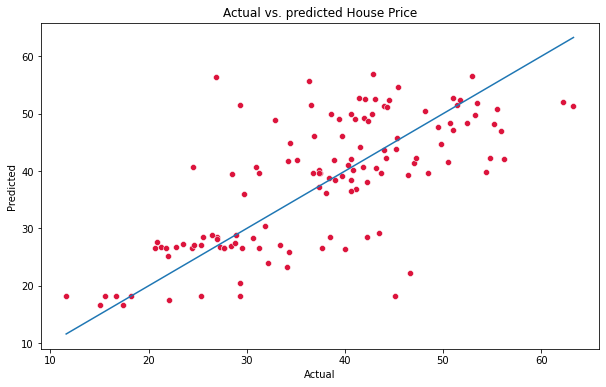

In [24]:
plt.figure(figsize=(10, 6))
plt.title('Actual vs. predicted House Price')
plt.xlabel('Actual')
plt.ylabel('Predicted')
sns.scatterplot(data=df_pred,x='y_test',y='y_pred',color='crimson');
p_min = min(min(y_test),min(y_pred))
p_max = max(max(y_test),max(y_pred))
p = [p_min,p_max]
plt.plot(p,p);